In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
print(os.listdir("/Users/priyanshshukla/Downloads/digit-recognizer"))


['.DS_Store', 'train.csv']


In [16]:
from sklearn.manifold import TSNE
df = pd.read_csv("train.csv")
df = df[0:5000]

In [13]:
label = df.label
df.drop("label", axis=1, inplace=True)

In [14]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(df)
standardized_data.shape

(10000, 784)

In [15]:
model = TSNE(n_components=2, random_state=0, perplexity=30, learning_rate=200, n_iter=1000)
reduced_data = model.fit_transform(standardized_data)

In [11]:
reduced_df = np.vstack((reduced_data.T, label)).T
reduced_df = pd.DataFrame(data=reduced_df, columns=["X", "Y", "label"])
reduced_df.label = reduced_df.label.astype(np.int)
reduced_df.head()

<ipython-input-11-e32bd9ff10d6>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  reduced_df.label = reduced_df.label.astype(np.int)


,X,Y,label
0,-42.808105,-34.291531,1
1,11.889394,49.377102,0
2,-61.311604,1.495121,1
3,19.965647,-59.478912,4
4,18.459185,57.017117,0


In [17]:
import seaborn as sns
reduced_df.dtypes

X        float64
Y        float64
label      int64
dtype: object

/Users/priyanshshukla/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


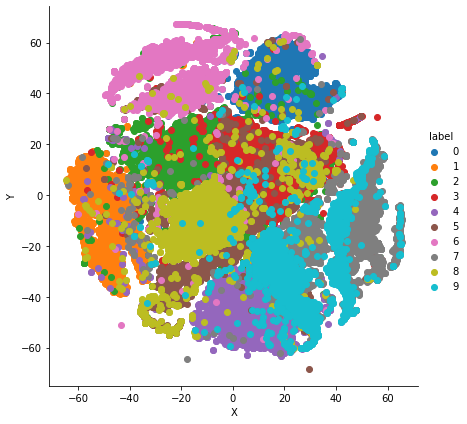

In [18]:
g = sns.FacetGrid(reduced_df, hue='label', size=6).map(plt.scatter, 'X', 'Y').add_legend()